In [2]:
import scipy.sparse as sp_sparse
import numpy as np
import re
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import scanpy as sc
import seaborn as sns
import scanpy.external as sce

In [3]:
data_path = '/nemo/lab/znamenskiyp/home/shared/resources/sharma_2020/'
sharma_expression_matrix = np.load(data_path + 'sharma_expression_matrix.npy')
sharma_cell_types = pd.read_csv(data_path + "sharma_2020_GSM4130750_WT_1.csv", sep=',', header=None, nrows=1).to_numpy()[0][1:]
sharma_cell_barcodes = pd.read_csv(data_path + "sharma_2020_GSM4130750_WT_1.csv", sep=',', header=None, nrows=1, skiprows=[0]).to_numpy()[0][1:]
sharma_gene_names = pd.read_csv(data_path + "sharma_2020_GSM4130750_WT_1.csv", sep=',', header=None, usecols=[0], skiprows=[0,1,2]).to_numpy().flatten()


adata = sc.AnnData(X=sharma_expression_matrix, obs=pd.DataFrame(index=sharma_cell_barcodes), var=pd.DataFrame(index=sharma_gene_names))
adata.obs['cell_type'] = sharma_cell_types
adata.obs_names_make_unique()
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [7]:
pciseq_data_path = '/nemo/lab/znamenskiyp/home/users/becalia/data/pciSeq/DRG_tdTom/20230518_ROI1_sharma2020/'
pciSeq_genes_df = pd.read_csv(pciseq_data_path + 'cellData.tsv', sep='\t')
pciseq_matrix

import ast
pciSeq_genes_df['Genenames'] = pciSeq_genes_df['Genenames'].apply(lambda s: list(ast.literal_eval(s)))
pciSeq_genes_df['CellGeneCount'] = pciSeq_genes_df['CellGeneCount'].apply(lambda s: list(ast.literal_eval(s)))
pciSeq_genes_df['ClassName'] = pciSeq_genes_df['ClassName'].apply(lambda s: list(ast.literal_eval(s)))
pciSeq_genes_df['Prob'] = pciSeq_genes_df['Prob'].apply(lambda s: list(ast.literal_eval(s)))
pciSeq_genes_df['BestClass'] = pciSeq_genes_df['ClassName'].apply(lambda x: x[0])

unique_genes = np.unique(np.concatenate(pciSeq_genes_df['Genenames']))
pciSeq_cell_info = pciSeq_genes_df[['Cell_Num', 'X', 'Y', 'BestClass']].copy()
# create new dataframe with cells as rows and genes as columns
cell_gene_matrix_df = pd.DataFrame(columns=unique_genes, index=pciSeq_genes_df.index)


for i, row in pciSeq_genes_df.iterrows():
    for gene, count in zip(row['Genenames'], row['CellGeneCount']):
        cell_gene_matrix_df.at[i, gene] = count
        
cell_gene_matrix_df.fillna(0, inplace=True)
cell_gene_matrix_df

,Aldoc,Arpp21,Calb1,Calb2,Car4,Cartpt,Cck,Cd24a,Cdh13,Cdh9,...,Rorb,Rrad,Serpine2,Spock3,Spon1,Synpr,Tac2,Th,Vstm2a,Zcchc12
0,1.863177,0.000000,0.054077,0.0,0.0,0.907346,0.0,6.807858,0.000000,0.000000,...,0.0,0.0,0.004793,0.054308,0.000000,0.035852,0.000000,1.997532,0.000000,0.000000
1,0.988857,0.998799,0.263393,0.0,0.0,0.000000,0.0,5.799951,0.993981,0.000000,...,0.0,0.0,0.675906,1.061691,0.000000,0.814798,0.000000,0.000000,0.000000,0.000000
2,0.306499,0.000000,0.000000,0.0,0.0,0.000000,0.0,19.543783,0.000000,0.000000,...,0.0,0.0,2.015839,3.672622,0.000000,0.021247,0.000000,2.178148,1.045544,0.000000
3,0.006477,0.000000,0.000000,0.0,0.0,0.993107,0.0,16.700048,0.000000,0.000000,...,0.0,0.0,2.011760,0.003848,0.000000,1.866044,0.000000,0.998011,0.000000,0.000000
4,0.019838,0.000000,0.632147,0.0,0.0,0.000000,0.0,87.422936,0.000000,0.000000,...,0.0,0.0,1.305401,0.000000,0.000000,3.969480,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.000000,0.000000,0.000000,0.0,0.0,0.034577,0.0,10.538845,0.000000,0.000000,...,0.0,0.0,0.000000,0.941965,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
566,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,40.523955,0.000000,0.512614,...,0.0,0.0,0.000000,2.776653,0.000000,0.000000,0.000000,1.000666,4.965691,0.000000
567,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,41.795839,0.000000,0.000000,...,0.0,0.0,2.802284,1.848586,0.000000,4.274790,0.000000,1.826537,0.005305,0.000000
568,2.933989,0.000000,0.000000,0.0,0.0,0.000000,0.0,16.349502,0.000000,0.000000,...,0.0,0.0,1.022674,1.706369,0.000000,0.404420,0.000000,0.036281,1.049400,0.000000


In [32]:
adata_pciseq = sc.AnnData(cell_gene_matrix_df)
adata_pciseq.obs['cell_type'] = pciSeq_cell_info['BestClass'].values

In [5]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [17]:
paola_genes = ['Arpp21',
    'Calb1',
    'Cdh13',
    'Cdh9',
    'Cox6a2',
    'Crym',
    'Enpp2',
    'Fam19a1',
    'Foxp2',
    'Kcnip1',
    'Ndnf',
    'Nov',
    'Nr4a2',
    'Nxph1',
    'Pcdh8',
    'Pde1a',
    'Rab3b',
    'Sorcs3',
     'Th',
    'Zcchc12']

high_expressing_genes = ['Cd24a', 'Rgs4', 'Nefl', 'Cplx1', 'Kcnab1', 'Nr4a2', 'Necab1', 'Hpcal1', 'Pcp4', 'Luzp2']

pciSeq_genes = ['Camk2n1',
 'Fxyd2',
 'Atp1b1',
 'Rprm',
 'Ngfr',
 'Etv1',
 'Atp2b4',
 'Nts',
 'Cd44',
 'Hapln1',
 'Ntrk2',
 'Homer2',
 'Ptprt',
 'Gfra2',
 'Kit',
 'Cntn1',
 'Gpr139',
 'Rab15',
 'Npy1r',
 'Gap43',
 'Gda',
 'Meg3',
 'Nptx1',
 'Synpr',
 'Gpr26',
 'Klhl1',
 'B2m',
 'Slit2',
 'Cbln2',
 'Ccnd1',
 'Pear1',
 'Cdh8',
 'Tmem8c',
 'Ambra1',
 'Arg1',
 'Fam84a',
 'Ccnb2',
 'Ppm1n',
 'Nsun7',
 'Casr',
 '9130008F23Rik',
 'Ankrd33',
 'Lncenc1',
 'Wnt7a',
 'Gm26569',
 'D130051D11Rik',
 'Mum1l1',
 'Comp',
 'Inhbb',
 'Mei4']

cortex_panel = []
    
skew_panel = ['Fxyd7',
 'Lgals1',
 'Nts',
 'Chchd10',
 'Pcp4',
 'Tac1',
 'Jak1',
 'Gap43',
 'S100b',
 'Tmem233',
 'Tagln3',
 'Ostf1',
 'Nefm',
 'Thy1',
 'Ngfr',
 'Ndufb6',
 'Ctxn3',
 'Nefh',
 'Cntn1',
 'Lxn',
 'Gm7271',
 'Hspb1',
 'Fez1',
 'Ntrk3',
 'S100a11',
 'Cdkn1a',
 'Ppp1r1a',
 'Ntrk2',
 'Hopx',
 'Pvalb',
 'Synpr',
 'Mpc2',
 'Piezo2',
 'Crip1',
 'Tubb2b',
 'Atp5o',
 'Sprr1a',
 '6330403K07Rik',
 'Gal',
 'Rgs5',
 'Celf4',
 'Fxyd6',
 'Clec2l',
 'Rarres1',
 'Dad1',
 'Ly86',
 'Cd44',
 'Scn1b',
 'Uqcrb',
 'Prkca',
 'Srxn1',
 'Psma7',
 'Prdx2',
 'Sox11',
 'Alcam',
 'Iqsec2']

skew_cur = ['Ppp1r1a',
 'Tmem233',
 'S100b',
 'Gap43',
 'Alcam',
 'Tac1',
 'Chchd10',
 'Ntrk2',
 'Synpr',
 'Ngfr',
 'Fxyd6',
 'Cntn1',
 'Rgs5',
 'Nts',
 'Clec2l',
 'Prkca',
 'Sox11',
 'Jak1',
 'Gm7271',
 'Pvalb',
 'Celf4',
 'Ntrk3',
 'Tmem158',
 'Hopx',
 'Rarres1',
 'Sprr1a',
 'Crip1',
 'Nbl1',
 'Pcp4',
 'Fxyd7',
 'Cd44',
 'Scd1',
 'Hspb1',
 'Ctnnbip1',
 'Iqsec2',
 'Cplx1',
 'Ctxn3',
 'Wbp5',
 'Hn1',
 'Pou4f1',
 'Lxn',
 'Nefm',
 'Fbxo9',
 'Gal',
 'Srxn1',
 'Tubb2b',
 'Ly86',
 'Piezo2',
 'Lgals1',
 'Scn7a']

gene_names = pd.read_csv(data_path + '94_gene_panel.csv', sep =',').to_numpy().flatten().tolist()

In [55]:
trunc_gene_names = ['Arpp21',
 'Calb1',
 'Calb2',
 'Car4',
 'Cartpt',
 'Cck',
 'Cd24a',
 'Cdh13',
 'Cdh9',
 'Chgb',
 'Chodl',
 'Cnr1',
 'Cplx1',
 'Cplx3',
 'Cpne6',
 'Crh',
 'Crhbp',
 'Crtac1',
 'Crym',
 'Ctgf',
 'Cux2',
 'Cxcl12',
 'Cxcl14',
 'Dgkb',
 'Enpp2',
 'Fam19a1',
 'Fezf2',
 'Foxp2',
 'Fxyd6',
 'Gap43',
 'Gpx3',
 'Hpcal1',
 'Id2',
 'Kcnab1',
 'Kcnc2',
 'Kcnip1',
 'Kcnip4',
 'Lamp5',
 'Luzp2',
 'Lypd1',
 'Lypd6',
 'Mt1',
 'Myl4',
 'Ndnf',
 'Necab1',
 'Necab2',
 'Nefl',
 'Nnat',
 'Nos1',
 'Nov',
 'Nr4a2',
 'Nrip3',
 'Nrn1',
 'Nxph1',
 'Pak1',
 'Pcdh8',
 'Pcp4',
 'Pcp4l1',
 'Pde1a',
 'Pdyn',
 'Penk',
 'Prdx5',
 'Pthlh',
 'Ptn',
 'Pvalb',
 'Rab3b',
 'Rbp4',
 'Rgs4',
 'Rorb',
 'Rrad',
 'Serpine2',
 'Spock3',
 'Spon1',
 'Synpr',
 'Tac2',
 'Th',
 'Vstm2a',
 'Zcchc12']

skew3 = ['Nts',
 'Jak1',
 'Ostf1',
 'Gm7271',
 'Ntrk2',
 'Pvalb',
 'Crip1',
 'Sprr1a',
 'Rarres1',
 'Srxn1',
 'Sox11']

skew5=['Fxyd7',
 'Lgals1',
 'Nts',
 'Pcp4',
 'Ntrk3',
 'Ntrk2',
 'Pvalb',
 'Sprr1a',
 'Cd9',
 'Gal',
 'Clec2l',
 'Sox11',
 'Cplx2',
 'Atf3',
 'Pcp4l1',
 'Cadps2',
 'Abhd2',
 'Lgals3',
 'Gadd45a',
 'S100a16',
 'Mdh1',
 'Pam',
 'Ldhb',
 'Nppb',
 'Stmn4',
 'Ifi27l2a',
 'Trappc3l']

max996 = ['mt-Co1',
 'Fth1',
 'mt-Atp6',
 'Ppia',
 'Tppp3',
 'Sepw1',
 'Ftl1',
 'Malat1',
 'mt-Nd1',
 'Ndufa4',
 'S100a6',
 'Cox8a',
 'Sh3bgrl3',
 'Cox4i1',
 'Txn1',
 'Actb',
 'Cd24a',
 'mt-Co3',
 'Calm2',
 'Hsp90ab1',
 'Atp5g1',
 'Cox6c',
 'Calm1',
 'Chchd2',
 'Actg1',
 'Stmn2',
 'Ywhah',
 'Cox5a',
 'Tmsb10',
 'Cox7c',
 'Fxyd7',
 'Rgs10',
 'Cox7a2',
 'Dynll1',
 'Prph',
 'Rps19',
 'Ndrg4',
 'S100a10',
 'Slc25a4',
 'Ubb',
 'Rpl13',
 'Rpl13a',
 'Map1b',
 'Fstl1',
 'Calca',
 'Map1lc3a',
 'Rpl3',
 'Rpl41',
 'Prkar1a',
 'Stmn3',
 'Kif21a',
 'Atp1b1',
 'Eif1',
 'mt-Cytb',
 'Uchl1',
 'Hint1',
 'Ywhag',
 'Pcsk1n',
 'Tuba1a',
 'Prune2',
 'Rgs4',
 'Nefl',
 'Oaz1',
 'mt-Co2',
 'Atpif1',
 'Meg3',
 'Rps14',
 'Trnp1',
 'Rps23',
 'Ppp1r2',
 'Rpl18a',
 'Cox6b1',
 'Uqcrh',
 'Eef1a1',
 'Rpl32',
 'Rps27a',
 'Rps9',
 'Tubb3',
 'Stmn1']

skewmax = ['Ppia',
 'Tppp3',
 'Ndufa4',
 'S100a6',
 'Cox8a',
 'Cox4i1',
 'Txn1',
 'Cd24a',
 'Hsp90ab1',
 'Atp5g1',
 'Cox6c',
 'Chchd2',
 'Cox5a',
 'Fxyd7',
 'Cox7c',
 'Rgs10',
 'Cox7a2',
 'Prph',
 'S100a10',
 'Ubb',
 'Slc25a4',
 'Stmn3',
 'Prkar1a',
 'Kif21a',
 'Uchl1',
 'mt-Cytb',
 'Tuba1a',
 'Rgs4',
 'Oaz1',
 'Trnp1',
 'Ppp1r2',
 'Cox6b1',
 'Uqcrh',
 'Rps9',
 'Tubb3',
 'Stmn1']

norm_med=['Cd24a',
 'Rgs10',
 'Ngfr',
 'Tmem233',
 'Calca',
 'Cntn1',
 'Fxyd2',
 'Ntrk2',
 'Nts',
 'Jak1',
 'Fxyd6',
 'Ntrk3',
 'Nbl1',
 'Tac1',
 'Pvalb',
 'Fxyd7',
 'Synpr',
 'Pcp4',
 'Clec2l',
 'Gal',
 'Rgs5',
 'Crip1',
 'Tmem158',
 'Gm7271',
 'Chchd10',
 'Sox11',
 'Cd44',
 'Hopx',
 'Sprr1a',
 'Prkca',
 'Piezo2',
 'Wbp5',
 'Rarres1',
 'Lgals1',
 'Scn7a',
 'Hn1',
 'Ppp1r1a',
 'Pmp22',
 'Ctxn3',
 'Cpne3',
 'Lxn',
 'Nefm',
 'S100b',
 'Cdkn1a',
 'Gng2',
 'Hspb1',
 'S100a11',
 'Tagln3',
 'Ctnnbip1',
 'Ly86',
 'Ostf1',
 'Thy1',
 'Srxn1',
 'Cox5a',
 'Iqsec2',
 'Ubb',
 'Phf24',
 'Nefh',
 'Fez1',
 'Txn1',
 'Calca']

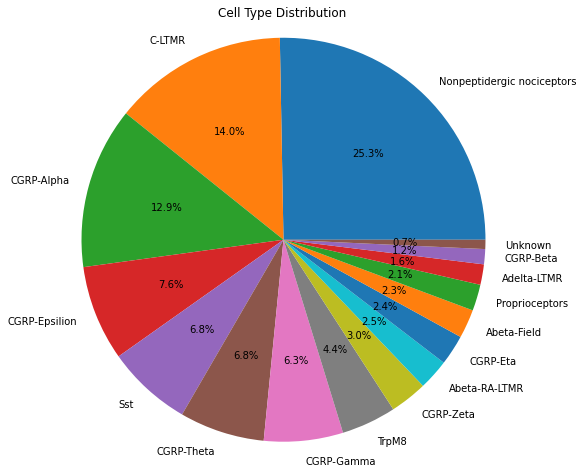

In [20]:


cell_type_counts = adata.obs.cell_type.value_counts()

# Step 3: Create a pie chart using the counted values
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(cell_type_counts, labels=cell_type_counts.index, autopct='%1.1f%%')
plt.title('Cell Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [27]:
adata_pciseq.obs.cell_type

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
565    NaN
566    NaN
567    NaN
568    NaN
569    NaN
Name: cell_type, Length: 570, dtype: object

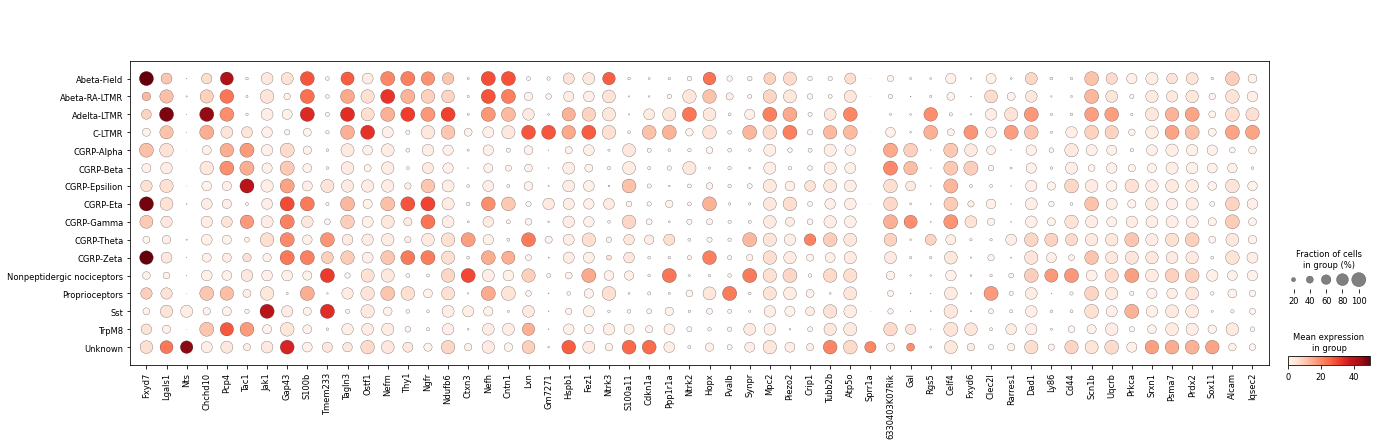

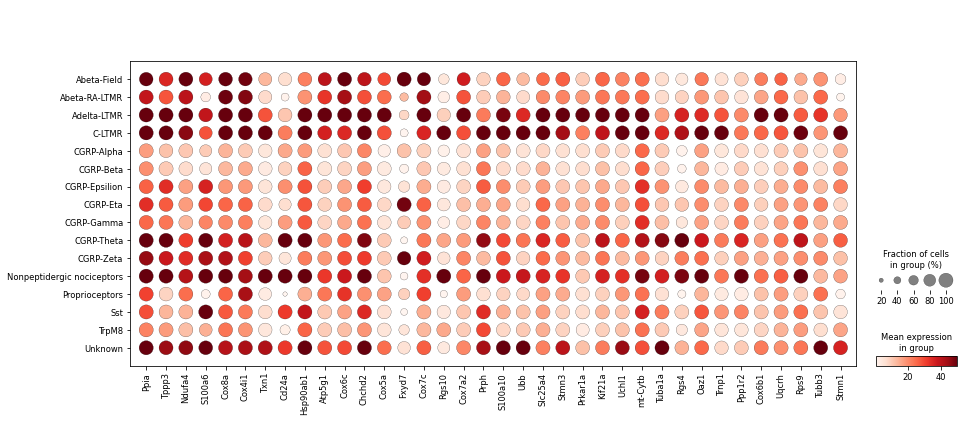

In [58]:
sc.pl.dotplot(adata, skew_panel, groupby='cell_type', vmax=50 )
sc.pl.dotplot(adata, skewmax, groupby='cell_type', vmax=50 )

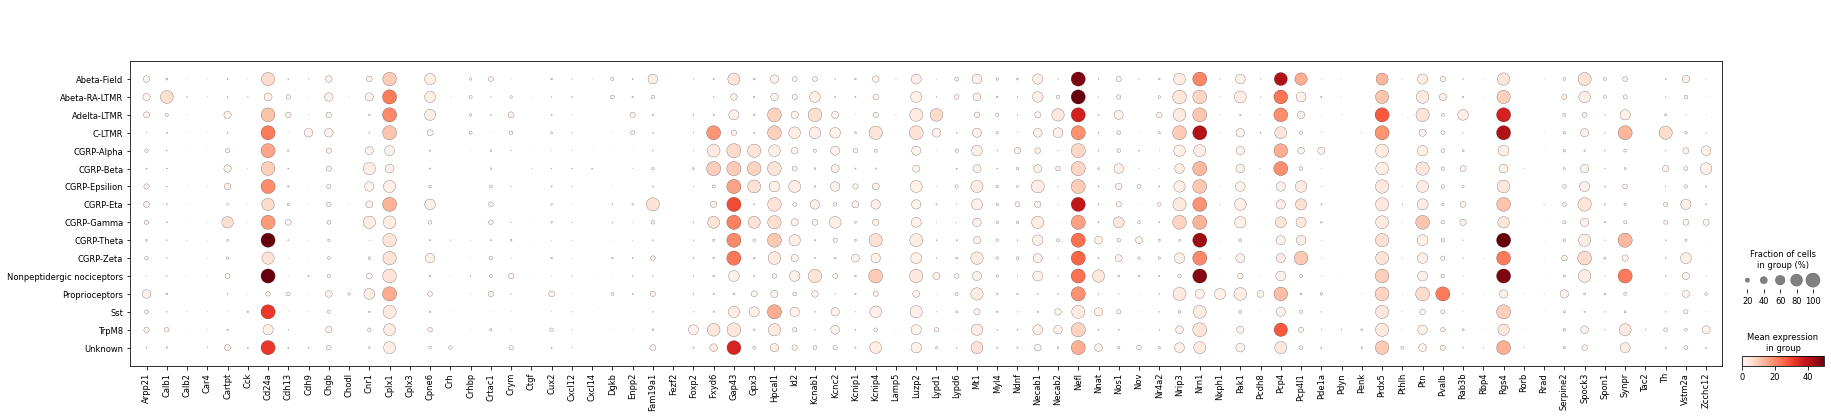

/camp/home/becalia/.conda/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical


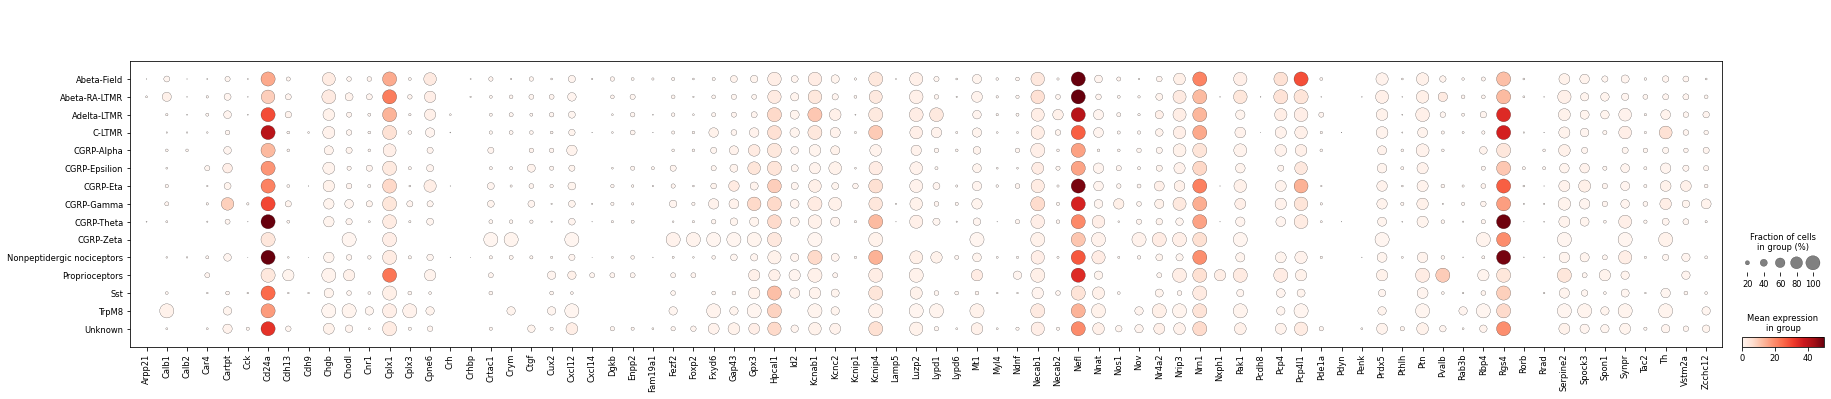

In [34]:
sc.pl.dotplot(adata, trunc_gene_names, groupby='cell_type', vmax=50 )
sc.pl.dotplot(adata_pciseq, trunc_gene_names, groupby='cell_type', vmax=50 )

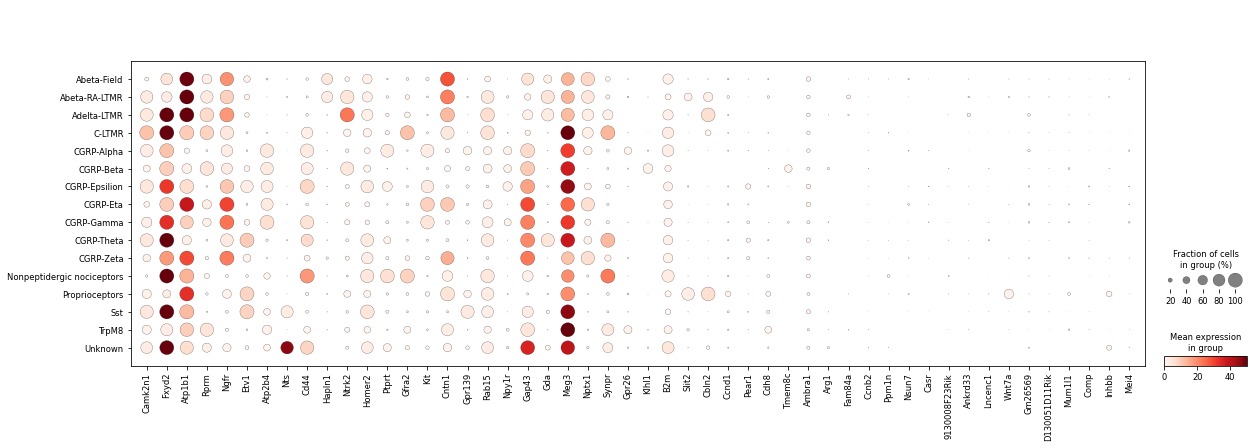

In [17]:
sc.pl.dotplot(adata, pciSeq_genes, groupby='cell_type', vmSax=50 )

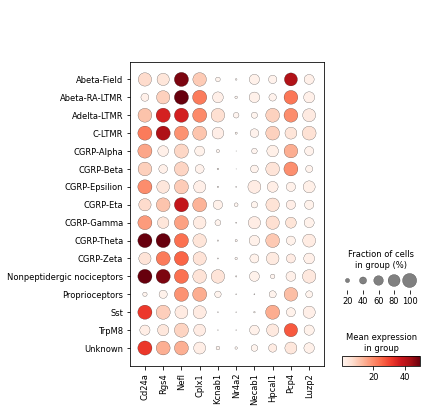

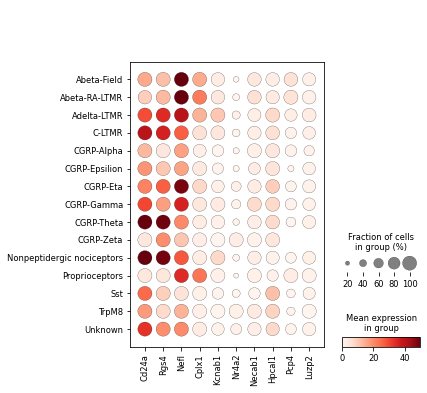

In [35]:
sc.pl.dotplot(adata, high_expressing_genes, groupby='cell_type' , vmax =50)
sc.pl.dotplot(adata_pciseq, high_expressing_genes, groupby='cell_type' , vmax =50)

c:\Users\becalia\Anaconda3\envs\RNAseq\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


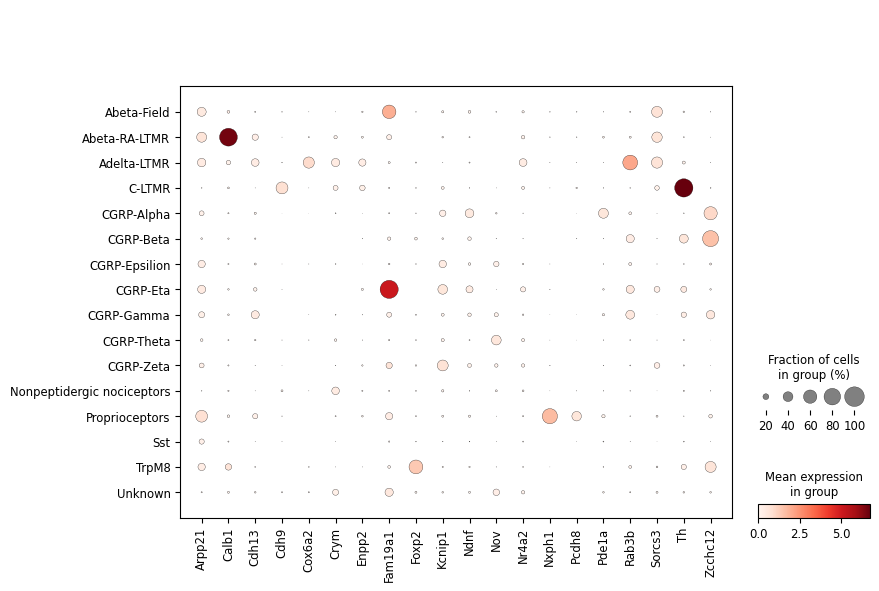

In [7]:
sc.pl.dotplot(adata, paola_genes, groupby='cell_type' )

In [27]:
gene_names = pd.read_csv('94_gene_panel.csv', sep =',').to_numpy().flatten().tolist()

In [ ]:
for gene in norm_med:
    ax = sc.pl.violin(adata, gene, groupby='cell_type', rotation=90.0, show=False)
    ax.set_ylim(0,200)

In [ ]:
for gene in paola_genes:
    ax = sc.pl.violin(adata, gene, groupby='cell_type', rotation=90.0, show=False)
    ax.set_ylim(0,20)

In [ ]:
for gene in high_expressing_genes:
    ax = sc.pl.violin(adata, gene, groupby='cell_type', rotation=90.0, show=False)
    ax.set_ylim(0,50)

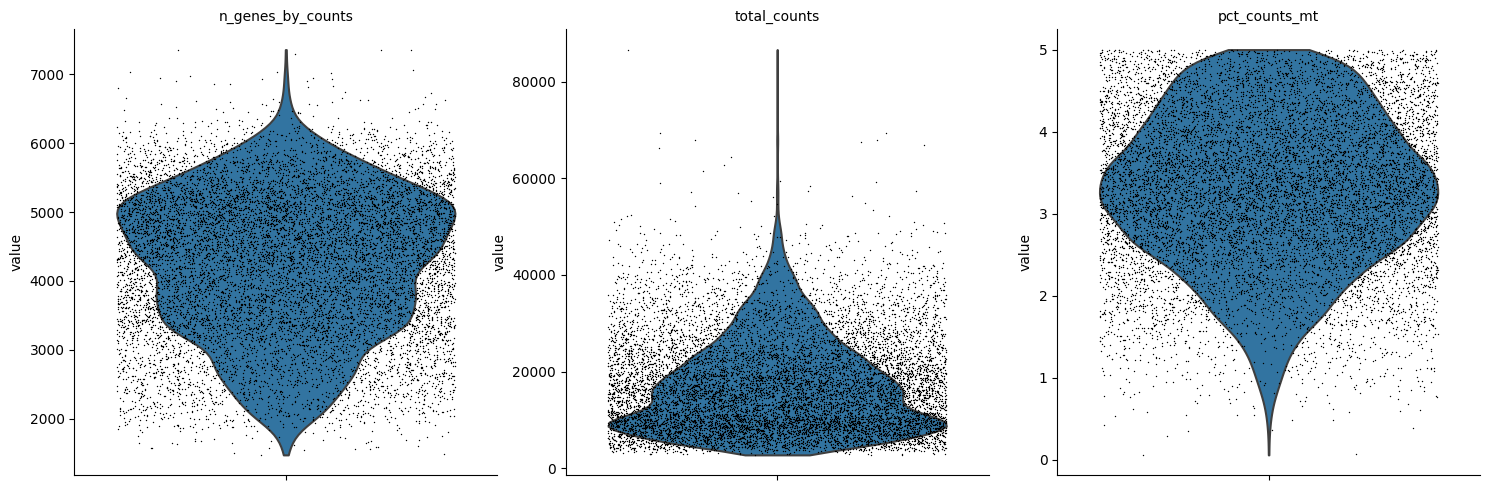

In [4]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

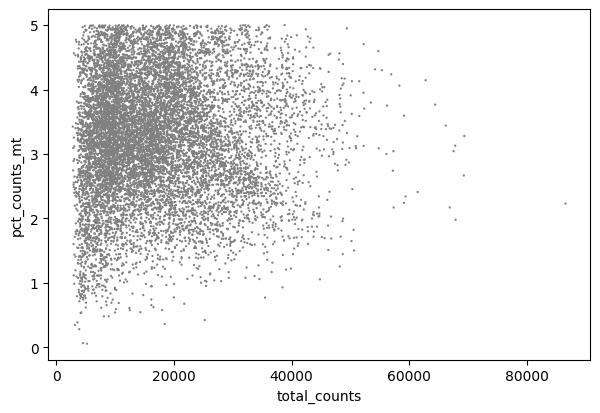

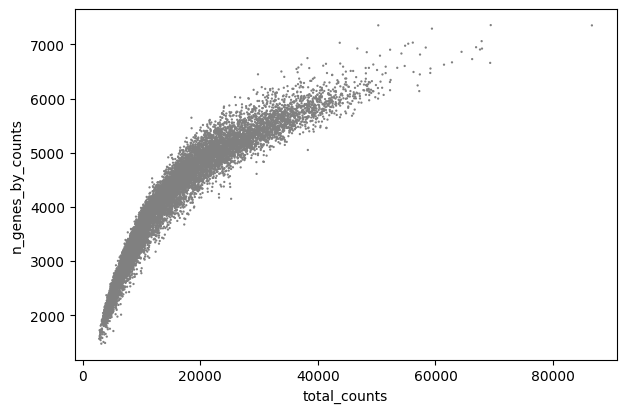

In [5]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [7]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.25)
# This saves the original set of genes 
adata.raw = adata

adata = adata[:,adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

c:\Users\becalia\Anaconda3\envs\RNAseq\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


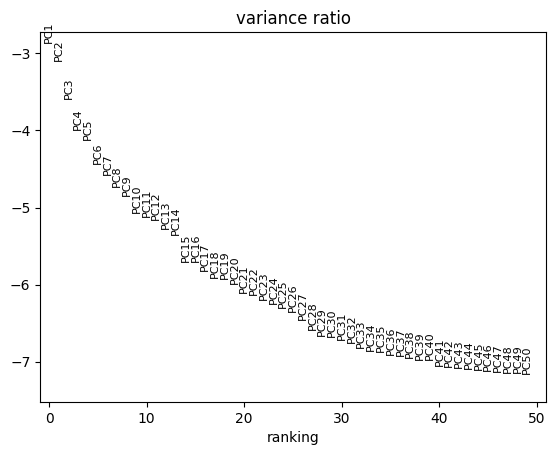

In [8]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50, save='') # scanpy generates the filename automatically

In [9]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

In [10]:
def one_col_lgd(umap):
    legend = umap.legend(bbox_to_anchor=[1.00, 0.5],
    loc='center left', ncol=1, prop={'size': 6})
    legend.get_frame().set_linewidth(0.0)
    for handle in legend.legendHandles:
        handle.set_sizes([25.0])
    return legend

c:\Users\becalia\Anaconda3\envs\RNAseq\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


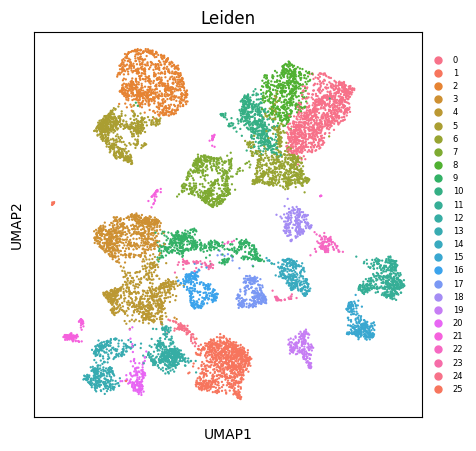

In [11]:
# by cluster
leiden_umap = sc.pl.umap(adata, color=['leiden'],
    show=False, palette=sns.color_palette("husl", 24),
legend_fontsize=6, frameon=True, title='Leiden')

lgd = one_col_lgd(leiden_umap)

fig = leiden_umap.get_figure()
fig.set_size_inches(5, 5)
fig.savefig(str(sc.settings.figdir) + '/umap_lgd_leiden',
    dpi=400, bbox_extra_artists=(lgd,), bbox_inches='tight')

c:\Users\becalia\Anaconda3\envs\RNAseq\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


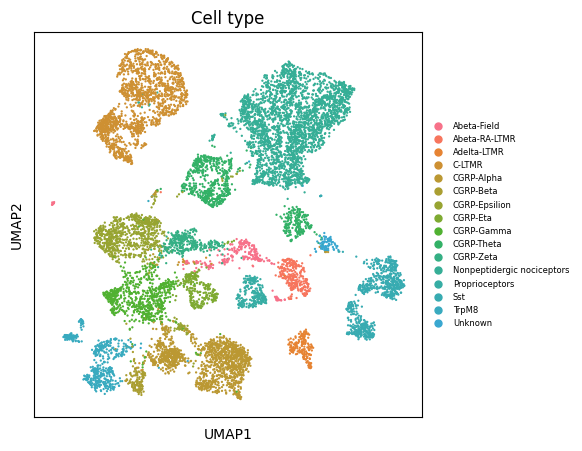

In [19]:
# by cluster
leiden_umap = sc.pl.umap(adata, color=['cell_type'],
    show=False, palette=sns.color_palette("husl", 24),
legend_fontsize=6, frameon=True, title='Cell type')

lgd = one_col_lgd(leiden_umap)

fig = leiden_umap.get_figure()
fig.set_size_inches(5, 5)

In [16]:
adata.write('sharma_adata.h5ad')